In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [40]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [3]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [41]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [42]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

In [43]:
t.test(data_1$measure, data_2$measure)


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -12.056, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.975853 -2.131763
sample estimates:
mean of x mean of y 
 10.14979  12.70360 


#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


Given that:
1. The alternative hypothesis states that the true difference in means is not equal to zero, and
2. the p-value is way less than .05 

We reject the null hypothesis and accept the alternative

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

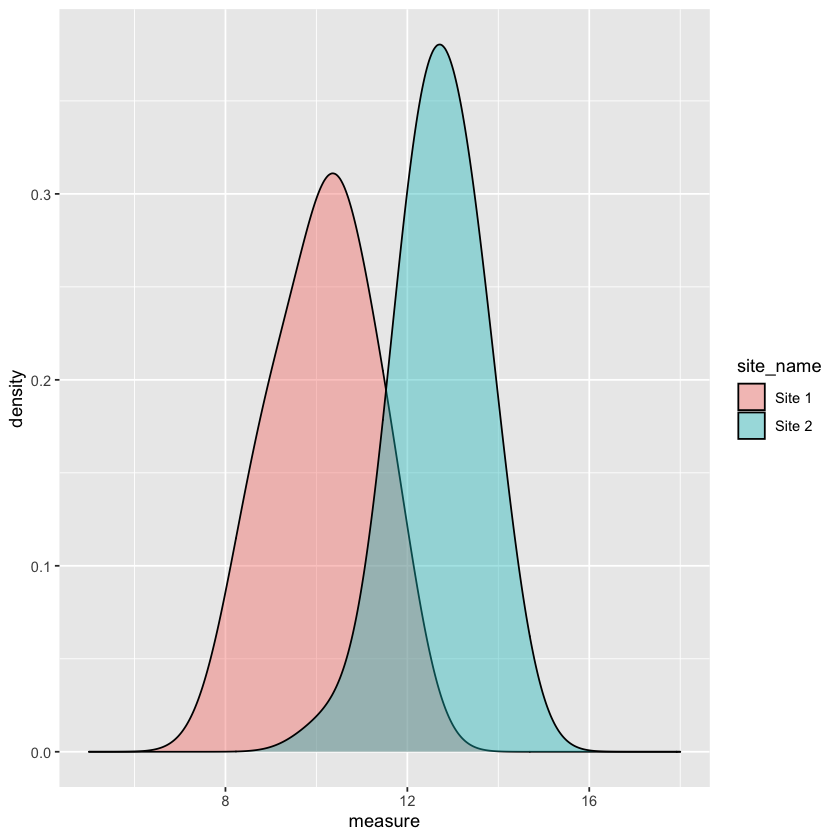

In [16]:
ggplot(complete_data, aes(x = measure, fill = site_name)) +
    geom_density(alpha = 0.4, bw = 0.65) +
    xlim(5, 18)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

In [23]:
processOneIter = function(data_1, data_2){
    concat_data = c(data_1, data_2)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
}

In [27]:
mean_under_null = replicate(1000, processOneIter(data_1$measure, data_2$measure))

In [30]:
observed_value <- mean(data_1$measure) - mean(data_2$measure)
observed_value

[1] -2.553808

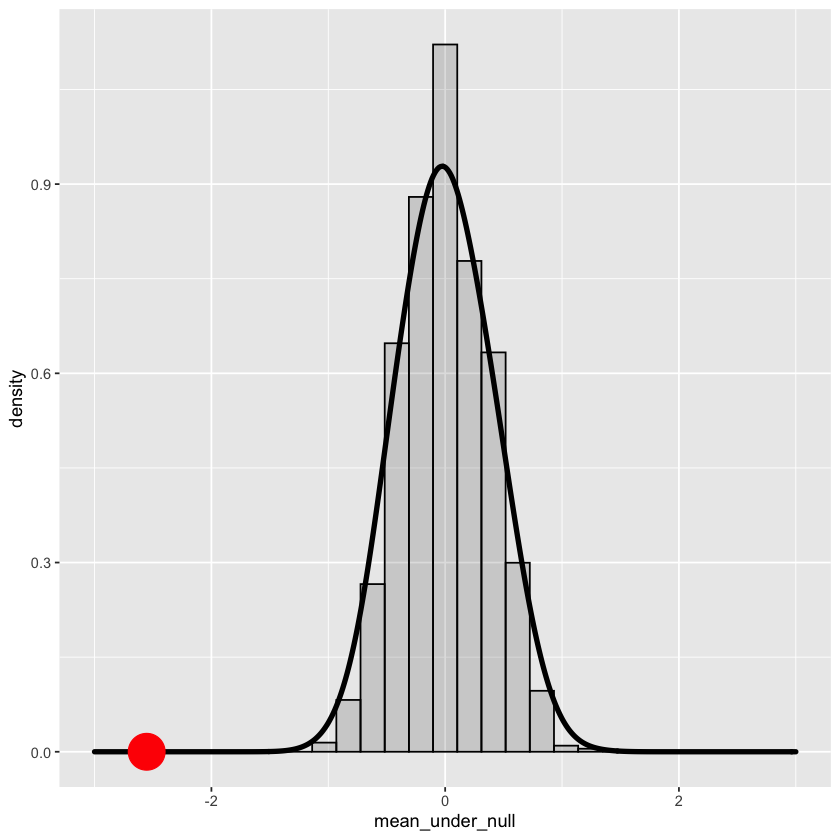

In [33]:
ggplot()+
    geom_histogram(aes(mean_under_null, y=..density..), bins=30, alpha=0.2, color="black") +
    geom_density(aes(mean_under_null), bw=0.2, size=1.5) +
    xlim(-3, 3) +
geom_point(aes(observed_value, 0), color="red", size=10)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [52]:
data <- t.test(rnorm(40, 10, 1), rnorm(40, 13, 1))
str(data)

List of 10
 $ statistic  : Named num -16
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 78
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 2.35e-26
 $ conf.int   : num [1:2] -3.62 -2.82
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 9.77 13
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 0.201
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "rnorm(40, 10, 1) and rnorm(40, 13, 1)"
 - attr(*, "class")= chr "htest"


In [58]:
data$p.value

[1] 2.354856e-26

Q2.4 
Compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

In [60]:
passes_t_test = replicate(1000,
    t.test(rnorm(40, 10, 1), rnorm(40, 13, 1))$p.value
)   < 0.05
sum(passes_t_test) / length(passes_t_test)

[1] 1

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [120]:
species <- c('P. lobata', 'P. lobata', 'M. capitata', 'M. capitata', 'P. meandrina', 'P. meandrina')
proportion <- c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
site <- rep(c("Site_X", "Site_Y"),3)
corals <- tibble(species, proportion, site)

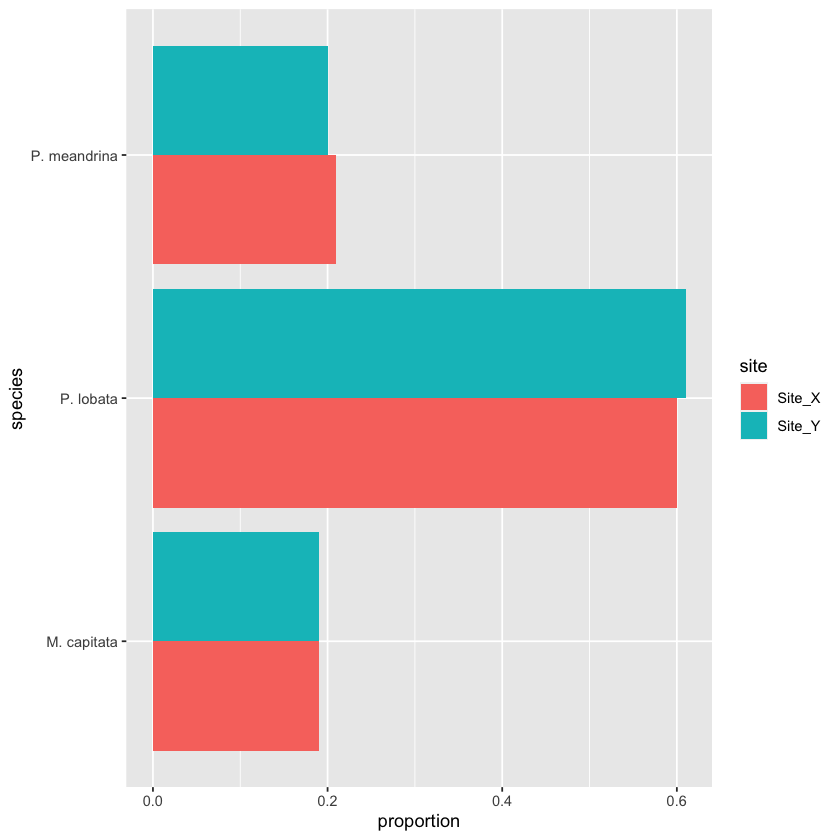

In [121]:
ggplot(corals, aes(fill=site, y=proportion, x=species)) +
    geom_bar(position="dodge", stat="identity") +
    coord_flip()

In [122]:
sampleOneIteration <- function(){
    true_proportions <- c(0.60, 0.19, 0.21)
    sample_proportion <- rmultinom(1, 200, prob=c(0.61, 0.19, 0.20))/200
    sample_tvd <- sum(abs(true_proportions- sample_proportion))/2
    sample_tvd
    
}

In [123]:
sampleOneIteration()
tvds <- replicate(1000, sampleOneIteration())

[1] 0.045

In [124]:
subtract_abs <- function(x){
    abs(x[1] - x[2])
}
observed_stat <- sum(tapply(corals$proportion,corals$species, subtract_abs))/2

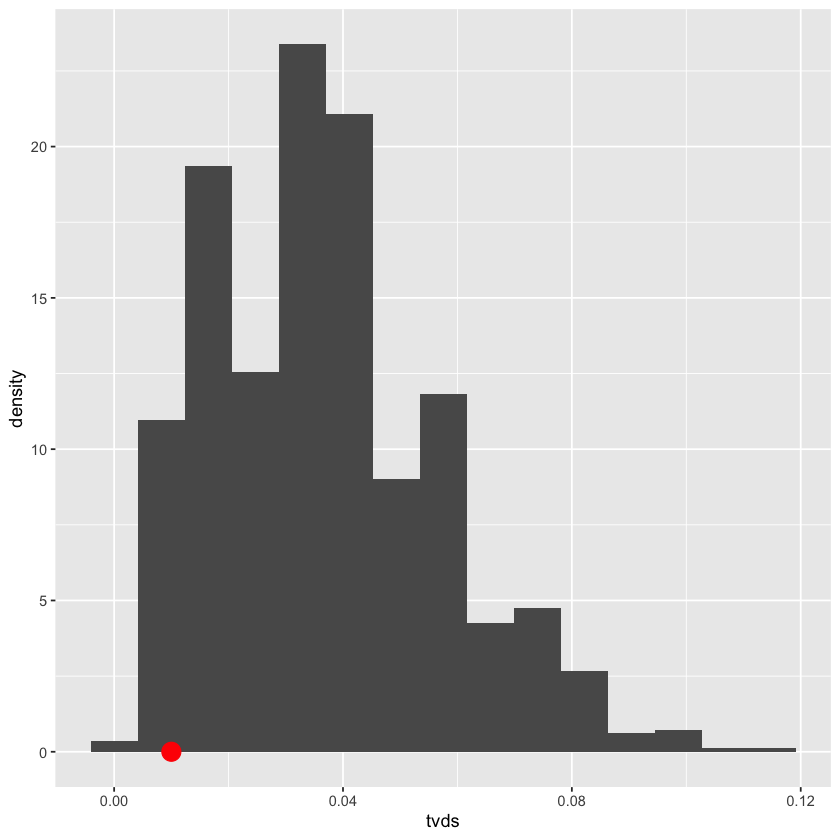

In [125]:
ggplot()+
    geom_histogram(aes(tvds, ..density..), bins = 15) +
    geom_point(aes(observed_stat, 0), size=5, color="red")  

In [132]:
data_one = data.frame(species, proportion, site)
data_one$site_name <- 'Site_X'
data_two = data.frame(species, proportion, site)
data_two$site_name <- 'Site_Y'
complete_data = rbind(data_1, data_2)

In [133]:
t.test(data_one$proportion, data_two$proportion)


	Welch Two Sample t-test

data:  data_one$proportion and data_two$proportion
t = 0, df = 10, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2709019  0.2709019
sample estimates:
mean of x mean of y 
0.3333333 0.3333333 


In [134]:
p_value = sum(tvds > observed_stat) / length(tvds)
p_value

[1] 0.952

#### We fail to reject the null hypothesis as our p-value is = 1